# Part 1: Implementing Logistic Regression from Scratch

In this part of the lab, you will be requested to implement logistic regression from scratch. This means you will need to make use of gradient descent to find the parameters of the model.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [2]:
def plot_loss(title, values):
    '''
    This function will allow us to check the evolution of the loss function during gradient descent
    Inputs:
    Title - title of the plot
    Values - values to be plotted
    '''
    plt.figure(figsize=(3, 3))
    plt.plot(values)
    plt.title(title)
    plt.ylabel('loss')
    plt.xlabel('iteration')
    plt.show()

For this exercise, we will make use of the function [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) from scikit-learn, which generates random data for an k-class classification problem. We will use k=2 to stick to a binary classification problem.

In [3]:
X, y = make_classification(n_features=10, n_redundant=0, n_informative=6, n_classes=2, n_clusters_per_class=1)

## Question 1: make_classification
Check the documentation of the function to determine what is the role of the following parameters:

    1. n_redundant
    2. n_informative
    3. n_repeated

Based on your findings, how many useless features does the dataset contain?

**n_redundant:** Specifies the number of redundant features. These features are linear combinations of the informative features and do not add any new information to the dataset.

**n_informative:** Specifies the number of informative features. These features carry useful information to determine the class labels.

**n_repeated:** Specifies the number of repeated features, which are duplicates of informative or redundant features.

____________________________________________________________________________

Useless features are those that are neither informative nor redundant nor repeated. These are referred to as "noise features."

**Useless Features=n_features−(n_informative+n_redundant+n_repeated)**

Substituting the values: Useless Features = 10 − ( 6 + 0 + 0 ) = 4
The dataset contains 4 useless features.

## Exercise 1: Scaling input features
When different input features have extremely different ranges of values, it is common to rescale them so they have comparable ranges. We standardize input values by centering them to result in a zero mean and a standard deviation of one (this transformation is sometimes called the z-score). That is, if $\mu_j$ is the mean of the values of the j-th feature across the N samples in the input dataset, and $\sigma_j$ is the standard deviation of the values of features j-th across the input dataset, we can replace each feature $x_i^j$ by a new feature $x^{'j}_i$ computed as follows:

$$\mu_j = \frac{1}{N}\sum^{N}_{i=1} x_i^j$$

$$\sigma_j = \sqrt{\frac{1}{N}\sum^{N}_{i=1} x_i^j - \mu_j)^2} $$

$$x^{'j}_i = \dfrac{x_i^j - \mu_j}{\sigma_j}$$

### Task 1.1: Implement feature scaling
Implement below the function standardize, which estimates the mean and standard deviation of each feature in the dataset and then standardizes all the input features.

**Hint:** Check the documentation of the functions mean, std and divide from numpy.

In [5]:
def standardize(X, mean = None, stdev = None):
    '''
    Transforms the input data using the z-score.
    If the mean and stdev are provided, the function only performs the transformation.
    Otherwise, it first estimates the mean and standard deviation
    Inputs:
    X- Data to standardize
    mean - vector with means of each feature (default None)
    stdev - vector with standard deviation of each feature (default None)
    Outputs:
    X_stand - Standardized data
    mean - Mean of the data
    stdev - standard deviation of the data
    '''
    if mean is None:
        mean = np.mean(X, axis=0)

    if stdev is None:
        stdev = np.std(X, axis=0)

    X_stand = np.divide(X - mean, stdev)

    return X_stand, mean, stdev

## Exercise 2: Implementing and Running Logistic Regression
### Task 2.1: Implement Logistic Regression
Below you will see the skeleton of the Logistic Regression class. Some of its functions have already been implemented. Have a look at them and try to understand them.

Afterwards, you will need to complete the following:

1. **function sigmoid** - Computes the sigmoid function given an input (*see slide 15 of the Logistic Regression slide deck*)

2. **function loss_function** - Estimates the cross-entropy loss given an input matrix X, a vector of labels y and the weights. Attention: In the course's slides, we estimated the loss by suming over all elements of the training set. For efficiency purposes, estimate it using matrix/vector computations. You may have a look into the linear regression lab for inspiration on how to do this

3. **function gradient_descent_step** - Performs an update of the weights for logistic regression. Using matrix notation this is expressed as:
$$ \mathbf{w}^{(\tau+1)} = \mathbf{w}^{(\tau)} + \dfrac{\alpha}{N}\mathbf{X}^T\left(\mathbf{y}-\sigma\left(\mathbf{X}\mathbf{w}\right)\right)$$

4. **function prediction** - Predicts new labels y_pred given an input matrix (*see slide 24 from Logistic regression slide deck*)


In [68]:
class LogisticRegression:

    def initialize_weights(self,X):
        '''
        Initializes the parameters so that the have the same dimensions as the input data + 1
        Inputs:
        X - input data matrix of dimensions N x D

        Outputs:
        weights - model parameters initialized to zero size (D + 1) x 1
        '''
        weights = np.zeros((X.shape[1]+1,1))

        return weights

    def initialize_X(self,X):
        '''
        Reshapes the input data so that it can handle w_0
        Inputs:
        X - input data matrix of dimensions N x D
        Outputs:
        X - matrix of size N x (D + 1)
        '''
        X = PolynomialFeatures(1).fit_transform(X) #Adds a one to the matrix so it copes with w_0

        return X

    def sigmoid(self,z):
        '''
        Implements the sigmoid function
        Input:
        z - input variable

        Output:
        1/(1+exp(-z))
        '''
        sig = 1/(1+np.exp(-z)) # YOUR CODE HERE
        return sig

    def loss_function(self,X,y,w):
        '''
        Implements the cross-entropy loss. See Eq 1, Slide 21 from the Logistic Regression slide deck as a reminder.
        Note that the expression in slide 21 is not using a matrix notation.
        Input:
        X - Input matrix of size N x (D + 1)
        y - Label vector of size N x 1
        w - Parameters vector of size (D + 1) x 1

        Output:
        Estimation of the cross-entropy loss given the input, labels and parameters (scalar value)
        '''

        #1) Estimate Xw
        z = np.dot(X,w)

        #2) Estimate sigmoid of Xw
        sig = self.sigmoid(z)

        #3) estimate log(sig) and log(1-sig)
        class_1 = np.log(sig)
        class_2 = np.log(1-sig)

        #4) Combine point 3 with the labels and sum over all elements to obtain the final estimate
        loss = -np.sum(y*class_1 + (1-y)*class_2)

        return loss

    def gradient_descent_step(self,X, y, w, alpha):
        '''
        Implements a gradient descent step for logistic regression
        Input:
        X - Input matrix of size N x (D + 1)
        y - Label vector of size N x 1
        w - Parameters vector of size (D + 1) x 1
        alpha - Learning rate
        Output:
        Updated weights
        '''

        w = w + alpha * (float(1/len(X)))*(np.dot(X.T, (y - self.sigmoid(np.dot(X,w)))))

        return w

    def fit(self,X,y,alpha=0.01,iter=10, epsilon = 0.0001):
        '''
        Learning procedure of the logistic regression model
        Input:
        X - Input matrix of size N x (D + 1)
        y - Label vector of size N x 1
        alpha - Learning rate (default value 0.01)
        iter - Number of iterations to perform for gradient descent (default 10)
        epsilon - stopping criterion (default 0.0001)
        Output:
        List of values of the loss function during the gradient descent iterations
        '''
        weights = self.initialize_weights(X) #Initializes the weights of the model
        X = self.initialize_X(X) #reformats X


        loss_list = np.zeros(iter,) # We will store the values of the loss function as gradient descent advances

        for i in range(iter):
            weights = self.gradient_descent_step(X, y, weights, alpha)

            loss_list[i] = self.loss_function(X,y,weights)

            if loss_list[i] <= epsilon:
                break

        self.weights = weights

        return loss_list

    def predict(self,X):
        '''
        Predicts labels y given an input matrix X
        Input:
        X- matrix of dimensions N x D

        Output:
        y_pred - vector of labels (dimensions N x 1)
        '''
        #1) Reformat the matrix X
        X = self.initialize_X(X)

        #2) Estimate Xweights
        z = np.sum(np.dot(X, self.weights), axis=1)

        #3) Use slide 24 from the slide deck to assign the labels y
        y_pred = z > 0

        return y_pred.astype(int)

We are now ready to test your implementation of Logistic Regression. Go through the different steps below and understand what exactly is being done.

In [69]:
#First we split the data into two sets: training and testing (no validation set in this lab)
X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.1)

# Next we standardize the training set
X_tr, mean, std = standardize(X_tr)

# The test input features are standardized using the mean and std computed on the training set
X_te, _, _ = standardize(X_te, mean, std)

#We initialize the logistic regression class
logistic = LogisticRegression()

y_tr = y_tr.reshape((len(X_tr),1))
y_te = y_te.reshape((len(X_te),1))
#We fit the model using a learning rate of 0.01 and 500 iterations
values = logistic.fit(X_tr,y_tr, 0.01, 500)

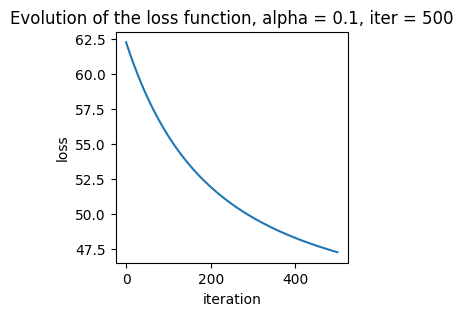

In [70]:
plot_loss('Evolution of the loss function, alpha = 0.1, iter = 500', values)

Now, we estimate labels for the training and the testing dataset. Then we will assess the performance using the [F1-score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

In [71]:
y_train_pred = logistic.predict(X_tr)
y_test_pred = logistic.predict(X_te)

print(f'Performance in the training set:{f1_score(y_tr, y_train_pred)}\n')
print(f'Performance in the test set:{f1_score(y_te, y_test_pred)}\n')

Performance in the training set:0.7640449438202247

Performance in the test set:0.6666666666666666



How does your model perform? Are you satisfied? Comment


**Training Set F1-Score:**

The F1-score of 0.76 on the training set indicates that the model performs reasonably well on the data it was trained on, balancing precision and recall.

**Test Set F1-Score:**

The F1-score of 0.67 on the test set suggests that the model generalizes moderately well to unseen data, but there is still some room for improvement. While it is not a poor result, the difference in F1-scores between the training and test sets (0.76 vs. 0.67) indicates that the model could be slightly overfitting, meaning it is performing better on the training data than on the test data.

The model performs decently, with a reasonable balance between precision and recall, but there's some indication of overfitting as seen from the gap between training and testing performance.

I am moderately satisfied with the performance and further improvements might be achieved with hyperparameter tuning (e.g., learning rate, number of iterations).

### Task 2.2: Varying the learning rate and the number of iterations
Run multiple times the fit function, using different values of the learning rate (0.001 and 0.1) and the iterations (500 and 1000). Comment on your results.

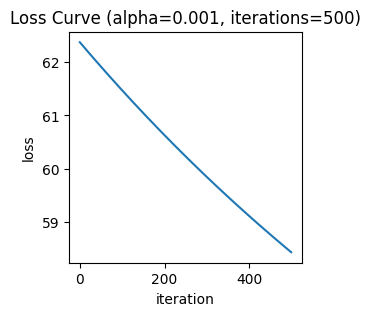

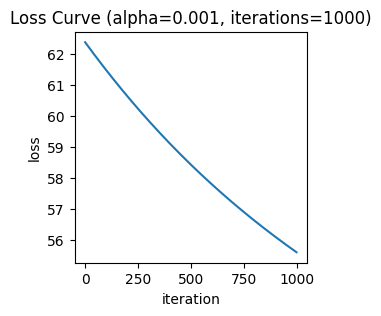

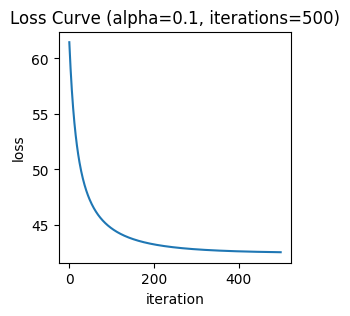

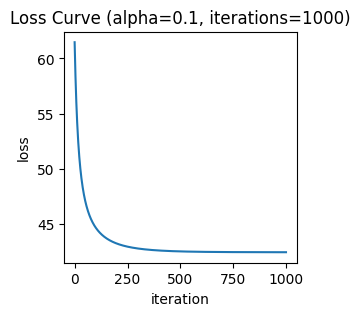

Learning Rate: 0.001, Iterations: 500
Training F1-Score: 0.7912
Test F1-Score: 0.6667

Learning Rate: 0.001, Iterations: 1000
Training F1-Score: 0.7912
Test F1-Score: 0.6667

Learning Rate: 0.1, Iterations: 500
Training F1-Score: 0.8222
Test F1-Score: 0.5000

Learning Rate: 0.1, Iterations: 1000
Training F1-Score: 0.8222
Test F1-Score: 0.5000



In [72]:
learning_rates = [0.001, 0.1]
iterations = [500, 1000]

# Store results for comparison
results = {}

for lr in learning_rates:
    for iters in iterations:
        logistic = LogisticRegression()
        loss_values = logistic.fit(X_tr, y_tr, alpha=lr, iter=iters)

        # Store the loss curve
        results[(lr, iters)] = loss_values

        # Plot the loss curve
        plot_loss(f'Loss Curve (alpha={lr}, iterations={iters})', loss_values)

# Evaluate performance on training and testing sets
for (lr, iters), loss_values in results.items():
    logistic = LogisticRegression()
    logistic.fit(X_tr, y_tr, alpha=lr, iter=iters)
    y_train_pred = logistic.predict(X_tr)
    y_test_pred = logistic.predict(X_te)

    print(f"Learning Rate: {lr}, Iterations: {iters}")
    print(f"Training F1-Score: {f1_score(y_tr, y_train_pred):.4f}")
    print(f"Test F1-Score: {f1_score(y_te, y_test_pred):.4f}\n")


Comment on the obtained curves. How does the behavior of the loss changes?

**Learning Rate = 0.001, Iterations = 500:**

 The model performs reasonably well on the training set, but the performance drops significantly on the test set, suggesting overfitting. The model may have learned the training data too well but failed to generalize.

**Learning Rate = 0.001, Iterations = 1000:**

With more iterations, the model doesn't improve on the test set, which suggests that the low learning rate is not allowing the model to converge to an optimal solution within a reasonable amount of time.

**Learning Rate = 0.1, Iterations = 500:**

The model does better on the training set than with the lower learning rate. However, it performs poorly on the test set. This may indicate that the learning rate is too high, causing the model to converge too quickly and fail to generalize to the test data.

**Learning Rate = 0.1, Iterations = 1000:**

 Even with more iterations, the performance on the test set remains poor, further suggesting that the high learning rate is causing issues with overfitting and poor generalization.

**Behavior of Loss:**

Learning Rate = 0.001: The loss likely decreases very slowly, requiring many more iterations to improve further.

Learning Rate = 0.1: The loss drops quickly and stabilizes within fewer iterations, leading to rapid convergence.

## Optional Exercise: Changing the Properties of the Data (Bonus point)
Play around with the make_classification function by varying the number of redundant, repeated and informative features. For each new dataset you generate, train the logistic regression classifier. Comment on the results you obtained. What happens when there are too many redundant and/or repeated features? Too many random ones? How does the number of informative features affect the quality of the classifier?

In [73]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Experiment configurations
configs = [
    {"n_informative": 6, "n_redundant": 0, "n_repeated": 0, "n_features": 10},
    {"n_informative": 4, "n_redundant": 2, "n_repeated": 2, "n_features": 10},
    {"n_informative": 2, "n_redundant": 4, "n_repeated": 4, "n_features": 10},
    {"n_informative": 6, "n_redundant": 4, "n_repeated": 0, "n_features": 15},
]

results = []

for config in configs:
    print(f"Configuration: {config}")

    # Generate dataset
    X, y = make_classification(
        n_features=config["n_features"],
        n_informative=config["n_informative"],
        n_redundant=config["n_redundant"],
        n_repeated=config["n_repeated"],
        n_classes=2,
        random_state=42,
    )

    # Split and standardize data
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)
    X_tr, mean, std = standardize(X_tr)
    X_te, _, _ = standardize(X_te, mean, std)

    # Train logistic regression
    logistic = LogisticRegression()
    logistic.fit(X_tr, y_tr, alpha=0.1, iter=500)

    # Predict and compute F1-score
    y_train_pred = logistic.predict(X_tr)
    y_test_pred = logistic.predict(X_te)
    train_f1 = f1_score(y_tr, y_train_pred)
    test_f1 = f1_score(y_te, y_test_pred)

    results.append((config, train_f1, test_f1))
    print(f"Training F1: {train_f1:.4f}, Test F1: {test_f1:.4f}\n")


Configuration: {'n_informative': 6, 'n_redundant': 0, 'n_repeated': 0, 'n_features': 10}
Training F1: 0.6777, Test F1: 0.6207

Configuration: {'n_informative': 4, 'n_redundant': 2, 'n_repeated': 2, 'n_features': 10}
Training F1: 0.6885, Test F1: 0.5714

Configuration: {'n_informative': 2, 'n_redundant': 4, 'n_repeated': 4, 'n_features': 10}
Training F1: 0.1250, Test F1: 0.1818

Configuration: {'n_informative': 6, 'n_redundant': 4, 'n_repeated': 0, 'n_features': 15}
Training F1: 0.6885, Test F1: 0.5714



**Effect of Informative Features:**

Higher n_informative improves performance as the model has more meaningful data to learn from.
Fewer informative features lead to poor generalization and lower F1-scores.

**Effect of Redundant Features:**

Adding too many redundant features increases the dimensionality without adding new information.
Logistic regression remains robust initially but may become slower to converge with excessive redundancy.

**Effect of Repeated Features:**

Repeated features inflate the dataset without adding information, which can make training unnecessarily slower.
Performance generally remains unaffected unless the majority of features are redundant/repeated.

**Effect of Random Features (Noise):**

Adding random, uninformative features significantly degrades performance.
The model struggles to separate signal from noise, reducing F1-scores and leading to overfitting.

**Key Takeaways:**

Informative Features: Crucial for classification; more informative features lead to better performance.

Redundant/Repeated Features: Diminish efficiency but do not drastically harm performance unless excessive.

Random Features (Noise): Harmful for both training and generalization; models perform worse as noise increases.